# 🐾 Animal Image Classification with CNN & Transfer Learning
This notebook trains a model to classify images into 15 animal classes using both CNN and MobileNetV2 (Transfer Learning).

In [ ]:
# Step 0: Setup
import tensorflow as tf
print("GPU Available:", tf.config.list_physical_devices('GPU'))

GPU Available: []


In [ ]:
# Step 1: Mount Drive (if dataset is in Google Drive)
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
# Step 3: Load & Explore Dataset
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_path = '/content/drive/MyDrive/Projects/Animal Classification/dataset'
classes = sorted(os.listdir(dataset_path))
print("Classes:", classes)
print("Total classes:", len(classes))

Classes: ['Bear', 'Bird', 'Cat', 'Cow', 'Deer', 'Dog', 'Dolphin', 'Elephant', 'Giraffe', 'Horse', 'Kangaroo', 'Lion', 'Panda', 'Tiger', 'Zebra']
Total classes: 15


In [ ]:
# Step 4: Preprocess Dataset
img_size = 224
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2,
                                   horizontal_flip=True, rotation_range=15, zoom_range=0.1)

train_data = train_datagen.flow_from_directory(dataset_path,
                                               target_size=(img_size, img_size),
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               subset='training')

val_data = train_datagen.flow_from_directory(dataset_path,
                                             target_size=(img_size, img_size),
                                             batch_size=batch_size,
                                             class_mode='categorical',
                                             subset='validation')

Found 1561 images belonging to 15 classes.
Found 383 images belonging to 15 classes.


In [ ]:
# Step 5: Basic CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,909,327 (91.21 MB)

 Trainable params: 23,909,327 (91.21 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 6: Train the CNN Model
history = model.fit(train_data, validation_data=val_data, epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 502s 10s/step - accuracy: 0.1022 - loss: 6.4364 - val_accuracy: 0.1906 - val_loss: 2.4899
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 198s 4s/step - accuracy: 0.2286 - loss: 2.4290 - val_accuracy: 0.3055 - val_loss: 2.2580
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 182s 4s/step - accuracy: 0.2946 - loss: 2.2114 - val_accuracy: 0.3420 - val_loss: 2.1251
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 184s 4s/step - accuracy: 0.3766 - loss: 1.9609 - val_accuracy: 0.3551 - val_loss: 2.0572
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 207s 4s/step - accuracy: 0.4290 - loss: 1.9011 - val_accuracy: 0.4230 - val_loss: 1.9166
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 181s 4s/step - accuracy: 0.4616 - loss: 1.7156 - val_accuracy: 0.3864 - val_loss: 1.9341
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 181s 4s/step - accuracy: 0.5066 - loss: 1.5852 - val_accuracy: 0.3681 - val_loss: 1.9958
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 183s 4s/step - accuracy: 0.5504 - loss: 1.4164 - val_accuracy: 0.3943 - 

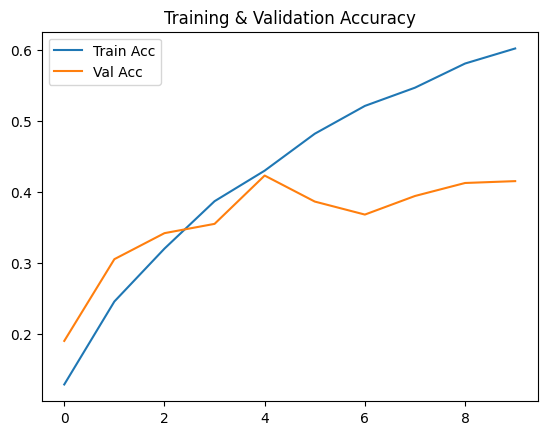

In [ ]:
# Step 7: Evaluate Model
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Training & Validation Accuracy')
plt.show()

In [ ]:
# Step 8: Transfer Learning with MobileNetV2
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

base_model = MobileNetV2(input_shape=(img_size, img_size, 3),
                         include_top=False, weights='imagenet')
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(len(classes), activation='softmax')(x)

model_tf = Model(inputs=base_model.input, outputs=predictions)
model_tf.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_tf.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,423,887 (9.25 MB)

 Trainable params: 165,903 (648.06 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# Train Transfer Learning Model
history_tf = model_tf.fit(train_data, validation_data=val_data, epochs=5)

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - accuracy: 0.3825 - loss: 2.0938 - val_accuracy: 0.8198 - val_loss: 0.6810
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 130s 3s/step - accuracy: 0.8175 - loss: 0.6254 - val_accuracy: 0.8486 - val_loss: 0.5181
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 130s 3s/step - accuracy: 0.8731 - loss: 0.4121 - val_accuracy: 0.8355 - val_loss: 0.5211
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 130s 3s/step - accuracy: 0.8817 - loss: 0.3846 - val_accuracy: 0.8851 - val_loss: 0.4408
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 131s 3s/step - accuracy: 0.9067 - loss: 0.2845 - val_accuracy: 0.8590 - val_loss: 0.4807


In [ ]:
# Step 9: Save Model
model.save("animal_classifier_model.h5")

In [ ]:
# Step 10: Predict New Image
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/content/drive/MyDrive/Projects/Animal Classification/dataset/Bird/Bird_1.jpeg'
img = image.load_img(img_path, target_size=(img_size, img_size))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
predicted_class = classes[np.argmax(pred)]
print("Predicted Class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
Predicted Class: Bird
